# **Task-1: Car Price Prediction**

In [28]:
!pip install scikit-learn pandas numpy

In [29]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataset Analysis**

In [30]:

file_path = '/content/drive/MyDrive/Creative ai dataset/car_data.csv'

try:

    df = pd.read_csv(file_path)


    print(df.head())
except FileNotFoundError:
    print(f"The file at {file_path} was not found. ")
except Exception as e:
    print(f"An error occurred: {e}")

         Make    Model                          Version      Price  Make_Year  \
0       Honda  Insight                              NaN  7400000.0       2019   
1  Mitsubishi   Minica                     Black Minica  1065000.0       2019   
2        Audi       A6  1.8 TFSI Business Class Edition  9300000.0       2015   
3      Toyota     Aqua                                G  2375000.0       2014   
4       Honda     City                       1.3 i-VTEC  2600000.0       2017   

     CC  Assembly  Mileage Registered City Transmission  
0  1500  Imported     2000   Un-Registered    Automatic  
1   660  Imported    68000          Lahore    Automatic  
2  1800     Local    70000          Lahore    Automatic  
3  1500  Imported    99900       Islamabad    Automatic  
4  1300     Local    55000       Islamabad       Manual  


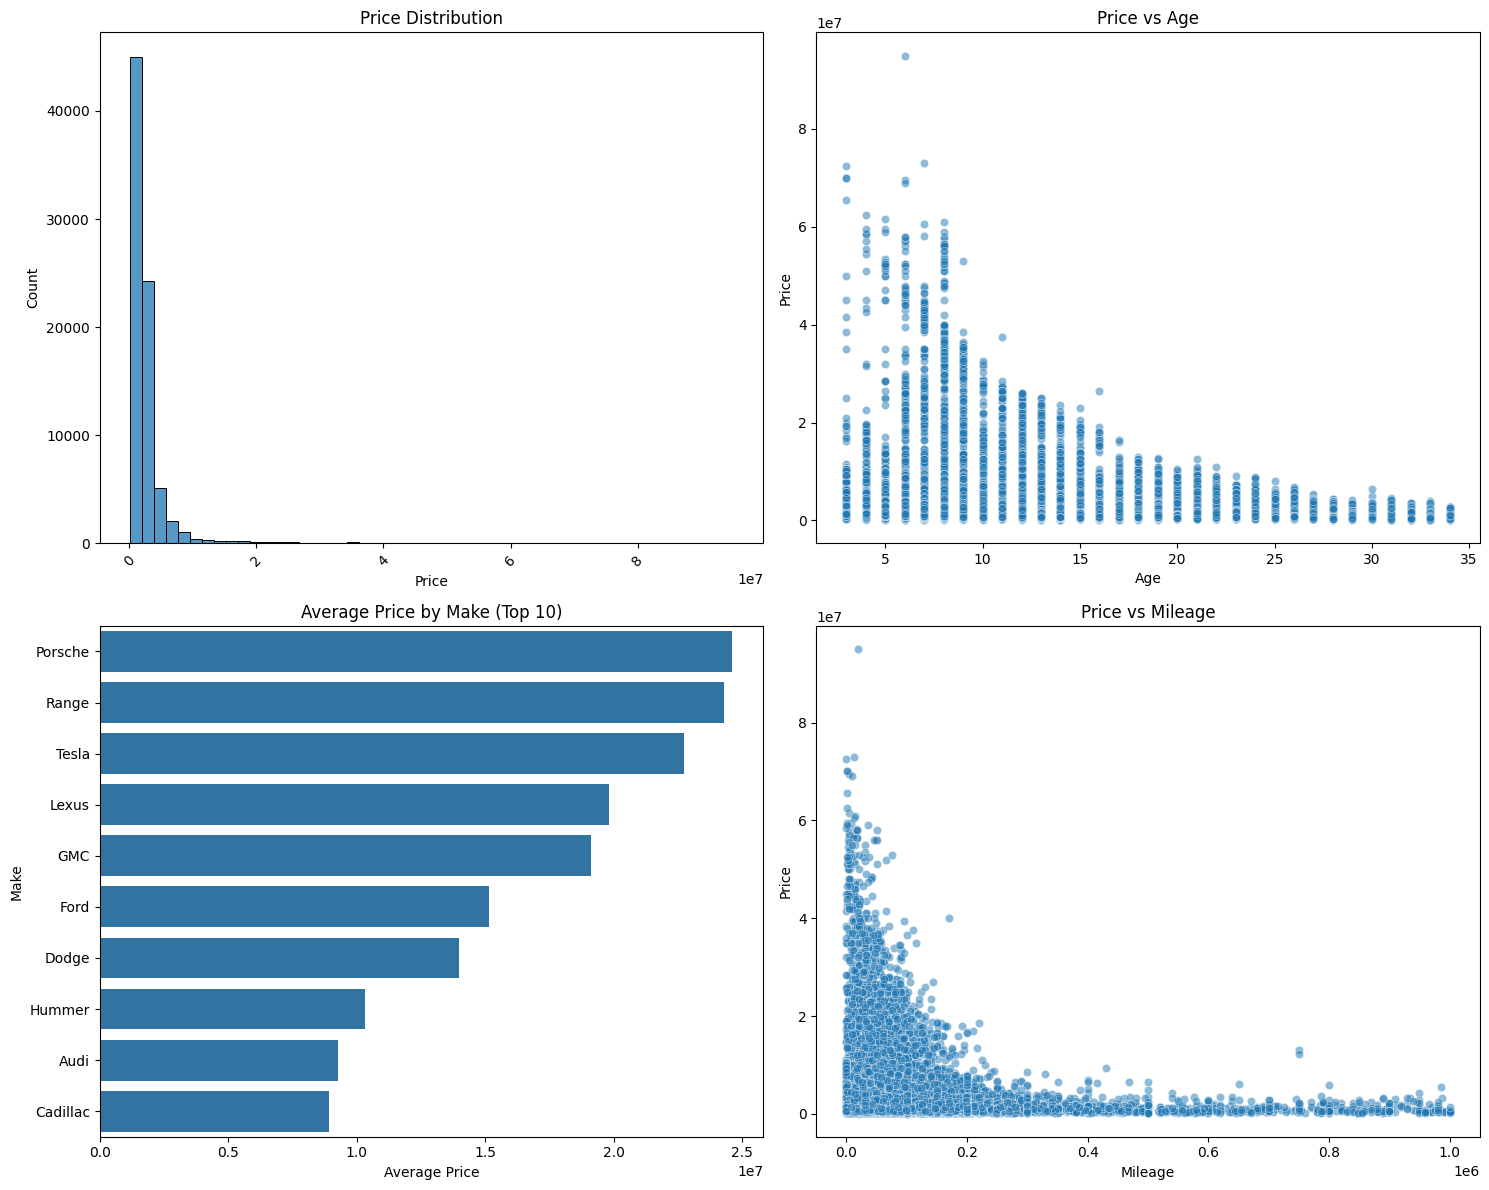

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Creative ai dataset/car_data.csv')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.histplot(data=df, x='Price', bins=50, ax=axes[0,0])
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price')
axes[0,0].tick_params(axis='x', rotation=45)

df['Age'] = 2024 - df['Make_Year']
sns.scatterplot(data=df, x='Age', y='Price', ax=axes[0,1], alpha=0.5)
axes[0,1].set_title('Price vs Age')

make_price = df.groupby('Make')['Price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=make_price.values, y=make_price.index, ax=axes[1,0])
axes[1,0].set_title('Average Price by Make (Top 10)')
axes[1,0].set_xlabel('Average Price')


sns.scatterplot(data=df, x='Mileage', y='Price', ax=axes[1,1], alpha=0.5)
axes[1,1].set_title('Price vs Mileage')

plt.tight_layout()
plt.show()

# **Model building**

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


file_path = '/content/drive/MyDrive/Creative ai dataset/car_data.csv'
df = pd.read_csv(file_path)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

def preprocess_data(df):
    df = df.copy()
    df.loc[:, 'Version'] = df['Version'].fillna('Unknown')
    df = df.dropna()

    df['Age'] = 2024 - df['Make_Year']

    categorical_cols = ['Make', 'Model', 'Version', 'Assembly', 'Registered City', 'Transmission']
    for col in categorical_cols:
        le = LabelEncoder()
        df[col + '_encoded'] = le.fit_transform(df[col])

    features = ['Age', 'CC', 'Mileage'] + [col + '_encoded' for col in categorical_cols]
    return df[features], df['Price']


X, y = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}


for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"RMSE: {metrics['RMSE']:,.2f}")
    print(f"R2: {metrics['R2']:.3f}")


Linear Regression:
RMSE: 2,682,856.57
R2: 0.518

Random Forest:
RMSE: 840,103.76
R2: 0.953


# **Model Comparison and Result analysis**

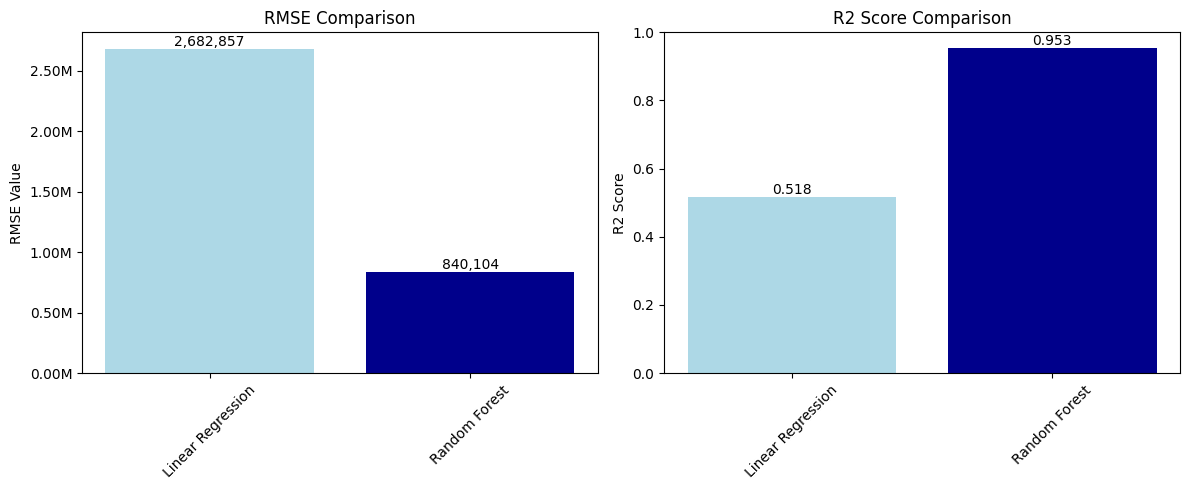

In [32]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Random Forest']
rmse = [2682856.57, 840103.76]
r2 = [0.518, 0.953]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(models, rmse, color=['lightblue', 'darkblue'])
ax1.set_title('RMSE Comparison')
ax1.set_ylabel('RMSE Value')

ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.2f}M'))
ax1.tick_params(axis='x', rotation=45)

ax2.bar(models, r2, color=['lightblue', 'darkblue'])
ax2.set_title('R2 Score Comparison')
ax2.set_ylabel('R2 Score')
ax2.set_ylim(0, 1)  # R2 score range is 0-1
ax2.tick_params(axis='x', rotation=45)

for i in range(len(models)):
   ax1.text(i, rmse[i], f'{rmse[i]:,.0f}', ha='center', va='bottom')
   ax2.text(i, r2[i], f'{r2[i]:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **Task-2: Movie Recommendation System**

# **Dataset analysis**

In [ ]:

file_path = '/content/drive/MyDrive/Creative ai dataset/movies_dataset.csv'

try:

    df = pd.read_csv(file_path)

    print(df.head())
except FileNotFoundError:
    print(f"The file at {file_path} was not found. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

                               title    1    2    3    4    5    6    7    8  \
0  10 Things I Hate About You (1999)  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                12 Angry Men (1957)  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0   
2       2001: A Space Odyssey (1968)  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   
3               28 Days Later (2002)  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4                         300 (2007)  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     9  ...  601  602  603  604  605  606  607  608  609  610  
0  0.0  ...  0.0  0.0  3.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  ...  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  ...  0.0  0.0  5.0  0.0  0.0  5.0  0.0  3.0  0.0  4.5  
3  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.5  0.0  5.0  
4  0.0  ...  0.0  0.0  0.0  0.0  3.0  0.0  0.0  5.0  0.0  4.0  

[5 rows x 607 columns]


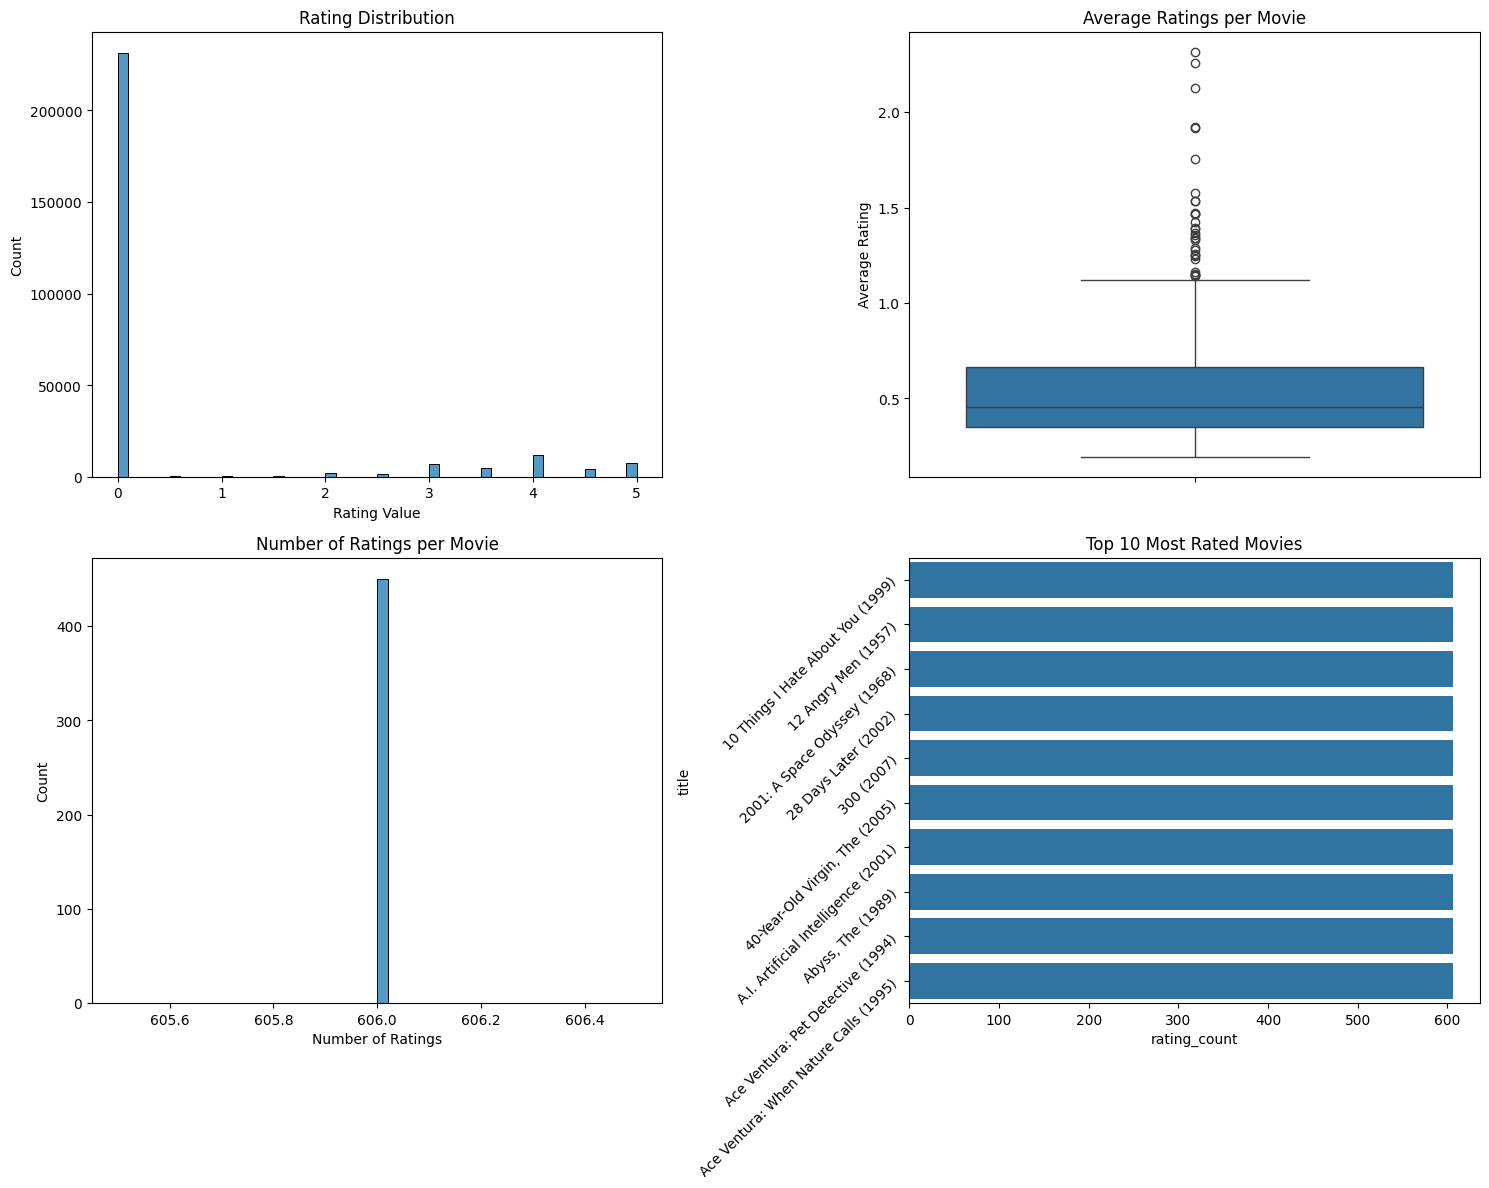

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


df = pd.read_csv('/content/drive/MyDrive/Creative ai dataset/movies_dataset.csv')

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

all_ratings = df.iloc[:, 1:].values.flatten()
all_ratings = all_ratings[~np.isnan(all_ratings)]
sns.histplot(data=all_ratings, bins=50, ax=axes[0,0])
axes[0,0].set_title('Rating Distribution')
axes[0,0].set_xlabel('Rating Value')

avg_ratings = df.iloc[:, 1:].mean(axis=1)
sns.boxplot(y=avg_ratings, ax=axes[0,1])
axes[0,1].set_title('Average Ratings per Movie')
axes[0,1].set_ylabel('Average Rating')

rating_counts = df.iloc[:, 1:].notna().sum(axis=1)
sns.histplot(data=rating_counts, bins=50, ax=axes[1,0])
axes[1,0].set_title('Number of Ratings per Movie')
axes[1,0].set_xlabel('Number of Ratings')

top_rated = df.assign(rating_count=rating_counts).nlargest(10, 'rating_count')
sns.barplot(data=top_rated, x='rating_count', y='title', ax=axes[1,1])
axes[1,1].set_title('Top 10 Most Rated Movies')
axes[1,1].tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.show()

# **Model Building**

In [36]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MinMaxScaler


df = pd.read_csv('/content/drive/MyDrive/Creative ai dataset/movies_dataset.csv')
movies = df['title']
ratings = df.iloc[:, 1:]

user_means = ratings.mean(axis=0)
movie_means = ratings.mean(axis=1)
ratings = ratings.fillna(movie_means)

scaler = MinMaxScaler()
ratings_scaled = scaler.fit_transform(ratings)

knn = NearestNeighbors(
   n_neighbors=10,
   algorithm='brute',
   metric='cosine',
   p=1.5
)
knn.fit(ratings_scaled)

def recommend_movie(input_movie, similarity_threshold=0.7):
   movie_idx = movies[movies == input_movie].index[0]
   movie_features = ratings_scaled[movie_idx].reshape(1, -1)

   distances, indices = knn.kneighbors(movie_features)
   similarities = 1 - distances[0]

   for idx, sim in zip(indices[0][1:], similarities[1:]):
       if sim >= similarity_threshold:
           return movies.iloc[idx], sim

   return movies.iloc[indices[0][1]], similarities[1]

input_movie = "American Pie (1999)"
recommended_movie, similarity = recommend_movie(input_movie)

print(f"input_movie = \"{input_movie}\"")
print(f"recommended_movie = \"{recommended_movie}\"")
print(f"Similarity Score: {similarity:.4f}")

input_movie = "American Pie (1999)"
recommended_movie = "Austin Powers: The Spy Who Shagged Me (1999)"
Similarity Score: 0.6312


# **Result Analysis**

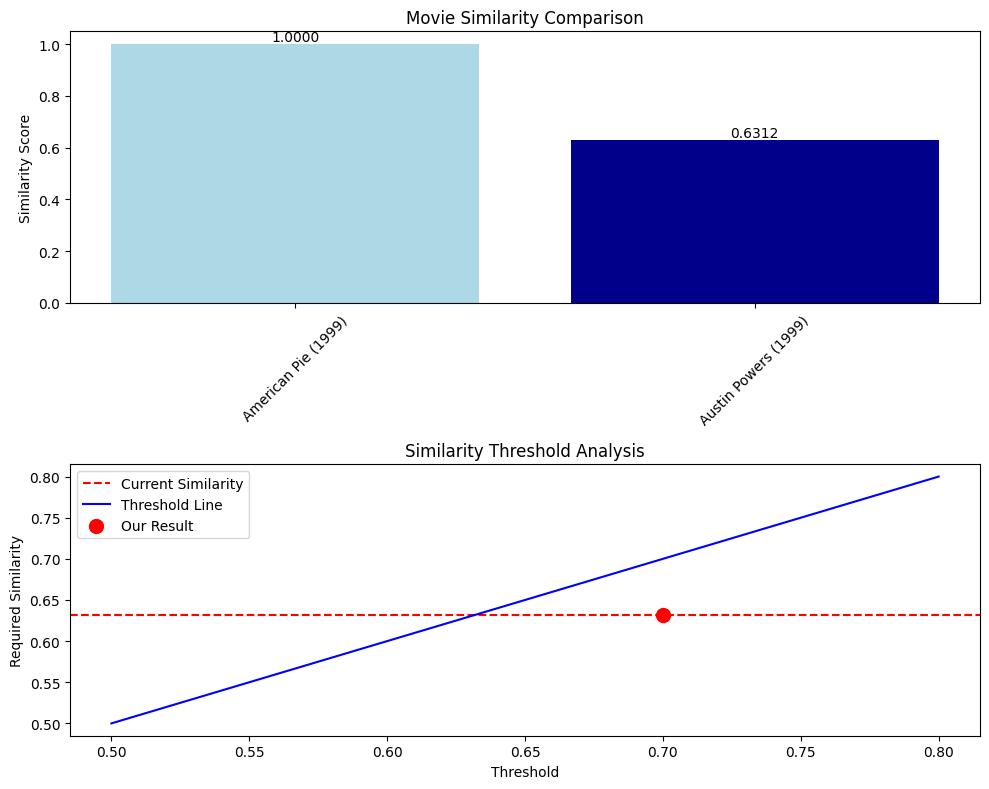

In [35]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(2, 1, figsize=(10, 8))

movies = ["American Pie (1999)", "Austin Powers (1999)"]
similarity = [1.0, 0.6312]
axes[0].bar(movies, similarity, color=['lightblue', 'darkblue'])
axes[0].set_title('Movie Similarity Comparison')
axes[0].set_ylabel('Similarity Score')
axes[0].tick_params(axis='x', rotation=45)
for i in range(len(movies)):
   axes[0].text(i, similarity[i], f'{similarity[i]:.4f}', ha='center', va='bottom')

thresholds = np.linspace(0.5, 0.8, 4)
recommendations = [0.6312]
axes[1].axhline(y=0.6312, color='r', linestyle='--', label='Current Similarity')
axes[1].plot(thresholds, thresholds, 'b-', label='Threshold Line')
axes[1].scatter([0.7], [0.6312], color='red', s=100, label='Our Result')
axes[1].set_title('Similarity Threshold Analysis')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Required Similarity')
axes[1].legend()

plt.tight_layout()
plt.show()